##### 앙상블 Ensemble

In [29]:
# 
# 여러 모델 또한 동일 모델 여러 개를 결합해 정확도 높은 모델을 만드는 학습법
# 
# 모델 및 샘플 결합 방법에 따른 분류
# 1. 보팅 : 다수결; 여러 모델의 예측값 중 최빈값으로 결정
#
# 2. 배깅 : 중복 허용 / 병렬
#           분류 땐 다중 투표, 회귀 땐 평균
#           => RandomForest
# 2-2. 페이스팅 : 중복 불허인 배깅 / 병렬
#               => ExtraTreesClassifier
# 3. 부스팅 : 이전 학습의 오답에 대한 가중치 부여 -> 다음 학습에서 오답에 대한 학습 진행
#            => 모델 성능 개선
#            => AdaBoost, GradientBoosting, XGBoost(따로 설치)
#

# [ 랜덤 포레스트 ]
# : 대표적인 앙상블 학습 / 여러 결정 트리: 
# - 동작 방식 : 1) 중복 허용하여 랜덤 추출(과적합 방지)  2) 무작위 특성 추출(불순도 최소)
#              3) 예측 결과 결정 : 분류 - 확률 평균 최대값, 회귀 - 예측값들의 평균값
# - 사용 이유 : 과적합 방지, 안정적 성능
# 
# [ Parameters ]
# - 

### 앙상블 모델과 단일 모델 성능 비교<hr>

- 데이터 : sklearn.datasets의 breast_cancer
- 유형 : 지도 학습 + 분류
- 방법 : LogisticRegression, DecisionTreeClassifier, RandomForestClassifier

In [30]:
# 1. Load Data
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(as_frame=True, return_X_y=True)
# print(X.shape, y.shape)

# 2. Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=11, stratify=y)

# 3. Training Data
# 1) LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
#2) DecisionTree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
# 3) Ensemble
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# 4. Evaluate Performances
print(f'[LogisticRegression] Train Score :{lr_model.score(X_train, y_train):.4f}, Test Score : {lr_model.score(X_test, y_test):.4f}')
print(f'[DecisionTree]       Train Score :{dt_model.score(X_train, y_train):.4f}, Test Score : {dt_model.score(X_test, y_test):.4f}')
print(f'[RandomForest]       Train Score :{rf_model.score(X_train, y_train):.4f}, Test Score : {rf_model.score(X_test, y_test):.4f}')

[LogisticRegression] Train Score :0.9573, Test Score : 0.9532
[DecisionTree]       Train Score :1.0000, Test Score : 0.9240
[RandomForest]       Train Score :1.0000, Test Score : 0.9357


In [ ]:
# oob_score=True : 
rf_model = RandomForestClassifier(random_state=11, oob_score=True)

In [45]:
rf_model.feature_importances_, rf_model.feature_names_in_

(array([0.0282136 , 0.01304   , 0.04831879, 0.03025443, 0.00557251,
        0.01380448, 0.04680188, 0.11663585, 0.00422181, 0.00411125,
        0.013733  , 0.00453421, 0.01506344, 0.07507422, 0.00339855,
        0.00314017, 0.01170014, 0.00324644, 0.00162801, 0.00469358,
        0.06629853, 0.01682066, 0.04898444, 0.13680261, 0.00771495,
        0.01647799, 0.04216156, 0.2064146 , 0.00667468, 0.00446361]),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst conca

In [60]:
# feature 속성 확인하기
import pandas as pd
import_feature = pd.DataFrame(rf_model.feature_importances_, rf_model.feature_names_in_).sort_values(by=0, ascending=False)
import_feature

,0
worst concave points,0.206415
worst area,0.136803
mean concave points,0.116636
area error,0.075074
worst radius,0.066299
worst perimeter,0.048984
mean perimeter,0.048319
mean concavity,0.046802
worst concavity,0.042162
mean area,0.030254


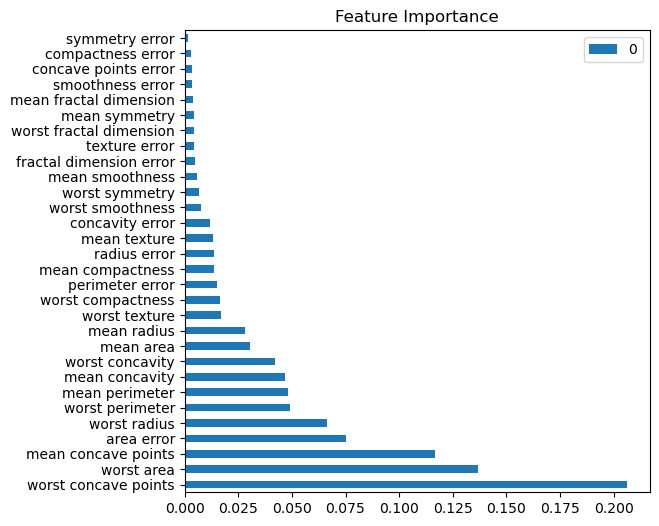

In [64]:
# Draw barh
import matplotlib.pyplot as plt
import_feature.plot(kind='barh', figsize=(6, 6))
plt.title('Feature Importance')
plt.show()

### 보팅 방식 모델 구현<hr>

- 데이터 : sklearn.datasets의 breast_cancer
- 유형 : 지도 학습 + 분류
- 방법 : Voting 방식으로 진행 => LogisticRegression, DecisionTreeClassifier, SVC
- 학습 데이터셋 : 동일 데이터셋, 3개 모델로 학습
- 변경 사항 : @

In [31]:
# 1. Load Data
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(as_frame=True, return_X_y=True)
# print(X.shape, y.shape)

# 2. Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=11, stratify=y
)

# 3. Training Data
# 1) LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver="liblinear")
lr_model.fit(X_train, y_train)
# 2) DecisionTree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# 3) SVC @
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

# 4) Ensemble : Voting @
from sklearn.ensemble import VotingClassifier
vt_models = VotingClassifier(
    estimators=[("lr_model", lr_model), ("dt", dt_model), ("svc", svc_model)],
    verbose=True,
)
vt_models.fit(X_train, y_train)
# Set model as estimators
# - LoR(and SVC) : OvR or OvA => 
# - 

[Voting] ................. (1 of 3) Processing lr_model, total=   0.0s
[Voting] ....................... (2 of 3) Processing dt, total=   0.0s
[Voting] ...................... (3 of 3) Processing svc, total=   0.0s


VotingClassifier(estimators=[('lr_model',
                              LogisticRegression(solver='liblinear')),
                             ('dt', DecisionTreeClassifier()), ('svc', SVC())],
                 verbose=True)

In [32]:
# 5) Predict : Hard Voting -> 이므로 
vt_models.predict(X_test)

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1])

In [33]:
# 6) Estimators in Voting instance
vt_models.estimators_   # [LogisticRegression(solver='liblinear'), DecisionTreeClassifier(), SVC()]

# 7) Predict in each estimator
import pandas as pd
new_data = pd.DataFrame([X_test.iloc[0]], columns=X.columns)
new_data
vt_models.predict(new_data)     # array([1])

array([1])

In [41]:
# 8) Predict_proba : Not in 'Hard'
# vt_models.predict_proba(new_data) => must be 'soft' voting

# 9) The ways to contact with estimators
# (1) .estimators
print('vt_models.estimators\n :', vt_models.estimators)

# (2) .name_estimators_
print('vt_models.named_estimators\n :', vt_models.named_estimators_)

# To calculate pred_proba using models: for .get( ) or model
print('\n[ To show predict_proba ]')
for name, model in vt_models.named_estimators_.items():
    print(f'By .get({name}) : {vt_models.named_estimators_.get(name).predict(new_data)[0]:.4f}', end=' | ')
    print(f'or directly : {model.predict(new_data)[0]:.4f}')


vt_models.estimators
 : [('lr_model', LogisticRegression(solver='liblinear')), ('dt', DecisionTreeClassifier()), ('svc', SVC())]
vt_models.named_estimators
 : {'lr_model': LogisticRegression(solver='liblinear'), 'dt': DecisionTreeClassifier(), 'svc': SVC()}

[ To show predict_proba ]
By .get(lr_model) : 1.0000 | or directly : 1.0000
By .get(dt) : 1.0000 | or directly : 1.0000
By .get(svc) : 1.0000 | or directly : 1.0000


In [42]:
### To use .pred_prob in SVC : probability=True

# print('[probability=False]', svc_model.predict_proba(new_data)) 
# => AttributeError: predict_proba is not available when  probability=False

svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)
svc_model.predict_proba(new_data)

array([[0.12453152, 0.87546848]])

In [ ]:
# 4. Evaluate Performances
print(f"[LogisticRegression] Train Score :{lr_model.score(X_train, y_train):.4f}, Test Score : {lr_model.score(X_test, y_test):.4f}")
print(f"[DecisionTree] Train Score :{dt_model.score(X_train, y_train):.4f}, Test Score : {dt_model.score(X_test, y_test):.4f}")
print(f"[RandomForest] Train Score :{rf_model.score(X_train, y_train):.4f}, Test Score : {rf_model.score(X_test, y_test):.4f}")